# pycontextfree tutorial

let's import pycontextfree:

In [1]:
import contextfree as cf

before you draw something you have to initialize the drawing surface.
This is dones with `init` command

In [2]:
cf.init(canvas_size=(200,200), background_color="#ffffff")

Let's draw someting, say a cricle: 

In [3]:
cf.circle()

and render it as IPython image

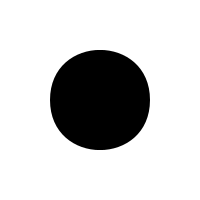

In [4]:
cf.display_ipython()

By the way, with `init()` you can set background and foreground color as well:

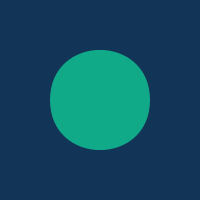

In [5]:
cf.init(canvas_size=(200, 200), background_color="#123456", face_color="#11AA89")
cf.circle()
cf.display_ipython()

Other primitive shapes in contextfree including box

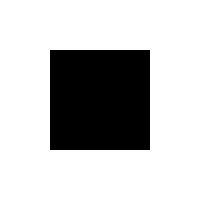

In [6]:
cf.init(canvas_size=(200,200), background_color="#ffffff")
cf.box()
cf.display_ipython()

and trianlge etc

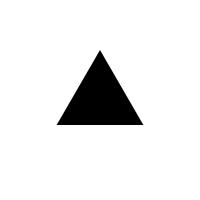

In [7]:
cf.init(canvas_size=(200,200), background_color="#ffffff")
cf.triangle()
cf.display_ipython()

Pycontextfree comes with a set of geometric and photometric transformations. For instance, to move to the 1 unit to the right:

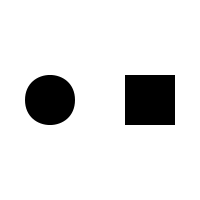

In [8]:
cf.init(canvas_size=(200, 200), background_color="#ffffff")
cf.circle()
with cf.translate(2, 0):
    cf.box()
cf.display_ipython()

Did you notice that each elements got smaller? That is because pycontextfree is tracking the positions of the elements and resized your drawing so that everything fits into the target canvas size.

Transformations can be nested one into another. Here is an example of another usefull transformation called `scale` - as the name implies, it scales the image. 

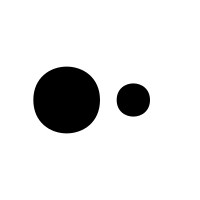

In [9]:
cf.init(canvas_size=(200, 200), background_color="#ffffff")
cf.circle()
with cf.translate(1, 0):
    with cf.scale(0.5):
        cf.circle()
cf.display_ipython()

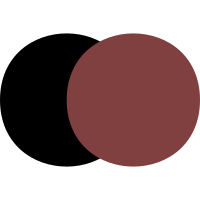

In [10]:
cf.init(canvas_size=(200, 200), background_color="#ffffff")
with cf.scale(2):
    cf.circle()
    with cf.translate(0.5, 0):
        with cf.color(hue=0.5, lightness=0.5, saturation=0.5, alpha=0.6):
            cf.circle()
cf.display_ipython()

Now we can write recursive rules to describe more interesting shapes.
To avoid infinite recursion, pycontextfree provides `check_limits` decorator. It will stop iteration when the element becomes smaller than one pixel in size. 

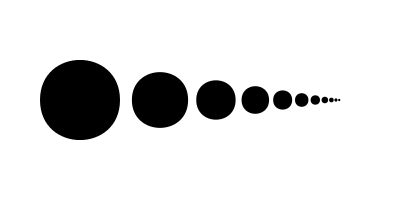

In [11]:
cf.init(canvas_size=(400, 200), background_color="#ffffff")
@cf.check_limits
def infinite_circles():
    cf.circle()
    with cf.translate(1, 0):
        with cf.scale(0.7):
            infinite_circles()
infinite_circles()
cf.display_ipython()

It is also possible to explicitly specify the maximal recursion depth

Pycontextfree allows to define several versions of a rule with same name and to assign probability to each version. Probabilities do not have to sum to 1, the values will be normalized by the runtime:

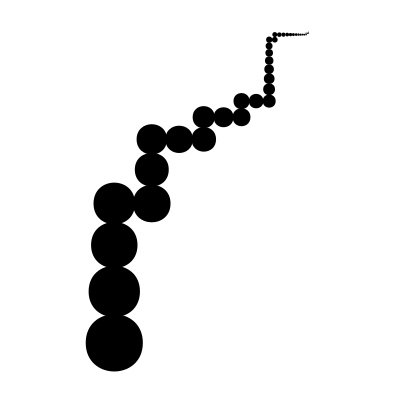

In [12]:
cf.init(canvas_size=(400, 400), background_color="#ffffff", max_depth=40)
@cf.rule(1)
def random_walk():
    cf.circle()
    with cf.scale(0.9):
        with cf.translate(1, 0):
            random_walk()

@cf.rule(1)
def random_walk():
    cf.circle()
    with cf.scale(0.9):
        with cf.translate(0, 1):
            random_walk()
random_walk()
cf.display_ipython()

Well, this should have covered the basics.

Please look at the [gallery](http://pycontextfree.blackbird.pw/gallery/) for more inspiration or at the API reference for more technical details :)

Cheers!